### 📚 Import all the necessary library first  

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from zlib import crc32

### 🔁 Now import necessary dataset 

In [25]:
# Since I am working with two dataset so I am gonna import both of them and do some data cleansing
movies = pd.read_csv("D:\Boring_Project1\data\movies.csv") 
movies["genres"] = movies["genres"].str.split("|")
movies_explode = movies.explode("genres")

movies_explode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22084 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  22084 non-null  int64 
 1   title    22084 non-null  object
 2   genres   22084 non-null  object
dtypes: int64(1), object(2)
memory usage: 690.1+ KB


<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\WorkStation\AppData\Local\Temp\ipykernel_20024\1871065881.py:2: SyntaxWarning: invalid escape sequence '\B'
  movies = pd.read_csv("D:\Boring_Project1\data\movies.csv")


### Below is the second dataset to be imported

In [26]:
ratings = pd.read_csv(r"D:\Boring_Project1\data\ratings.csv")
# Since the timestamp is in seconds we will use datetime method from pandas to convert it.
ratings["date"] = pd.to_datetime(ratings["timestamp"], unit='s') 
ratings = ratings.drop(["timestamp"], axis=1)  # dropping the datetime column for uncessary changes 
ratings["date"] = ratings["date"].dt.date # getting only date and excluding the time.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   date     100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


### Merge the dataset 

In [27]:
df = movies_explode.merge(ratings) # use explode method to merge
df.head(10)

,movieId,title,genres,userId,rating,date
0,1,Toy Story (1995),Adventure,1,4.0,2000-07-30
1,1,Toy Story (1995),Adventure,5,4.0,1996-11-08
2,1,Toy Story (1995),Adventure,7,4.5,2005-01-25
3,1,Toy Story (1995),Adventure,15,2.5,2017-11-13
4,1,Toy Story (1995),Adventure,17,4.5,2011-05-18
5,1,Toy Story (1995),Adventure,18,3.5,2016-02-11
6,1,Toy Story (1995),Adventure,19,4.0,2000-08-08
7,1,Toy Story (1995),Adventure,21,3.5,2014-08-09
8,1,Toy Story (1995),Adventure,27,3.0,2000-07-04
9,1,Toy Story (1995),Adventure,31,5.0,1996-12-13


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274480 entries, 0 to 274479
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  274480 non-null  int64  
 1   title    274480 non-null  object 
 2   genres   274480 non-null  object 
 3   userId   274480 non-null  int64  
 4   rating   274480 non-null  float64
 5   date     274480 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.6+ MB


In [29]:
df[df["rating"] < 3]

,movieId,title,genres,userId,rating,date
3,1,Toy Story (1995),Adventure,15,2.5,2017-11-13
23,1,Toy Story (1995),Adventure,68,2.5,2006-09-17
26,1,Toy Story (1995),Adventure,76,0.5,2015-08-10
28,1,Toy Story (1995),Adventure,82,2.5,2004-05-13
43,1,Toy Story (1995),Adventure,132,2.0,2006-09-10
...,...,...,...,...,...,...
274449,190207,Tilt (2011),Romance,338,1.5,2018-06-28
274451,190213,John From (2015),Drama,338,1.0,2018-06-28
274452,190215,Liquid Truth (2017),Drama,338,1.5,2018-06-28
274453,190219,Bunny (1998),Animation,338,1.0,2018-06-28


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274480 entries, 0 to 274479
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  274480 non-null  int64  
 1   title    274480 non-null  object 
 2   genres   274480 non-null  object 
 3   userId   274480 non-null  int64  
 4   rating   274480 non-null  float64
 5   date     274480 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.6+ MB


### 📊 Plot the analysis 

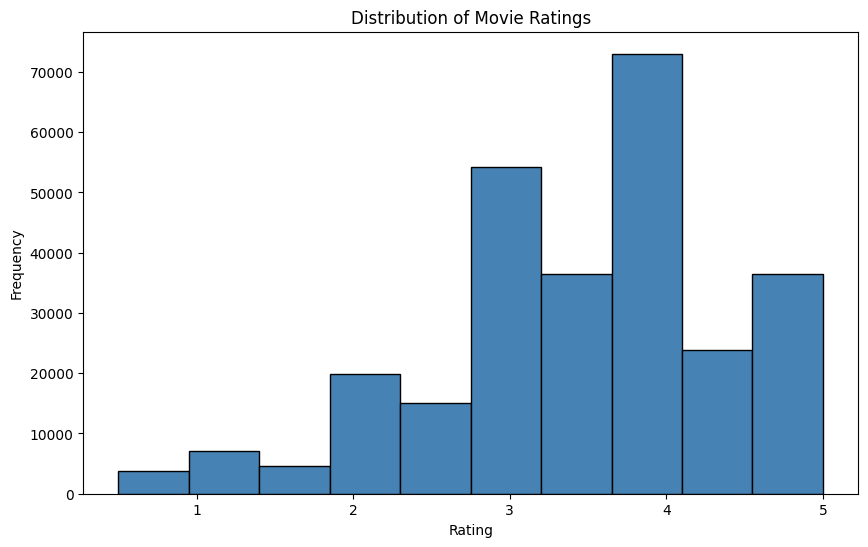

In [31]:
# Plot a histogram of the ratings
plt.figure(figsize=(10, 6))
df['rating'].plot(kind='hist', bins=10, color='steelblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### 📖 divise your dataset 

In [32]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [41]:
df['rating_cat'] = pd.cut(df['rating'],
                          bins=[0.0, 1.5, 3.0, 4.5, 5.0],
                          labels=[1, 2, 3, 4])


In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
# using stratified shuffling to safely train our model from baising towards Imbalance data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["rating_cat"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]
# for exact reference how its been done see part I of chapter 2 from Hand on machine learning book by Aurelien-Geron

### Checking how much rating category proportions in the overall dataset

In [35]:
strat_test_set["rating_cat"].value_counts() / len(strat_test_set)

rating_cat
3    0.485955
2    0.324851
4    0.132797
1    0.056398
Name: count, dtype: float64

In [38]:
def ratings_prop(data):
    return data["rating_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": ratings_prop(df),
    "Stratified %": ratings_prop(strat_test_set),
    "Random %": ratings_prop(test_set),
}).sort_index()
compare_props.index.name = "Ratings Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Ratings Category,,,,,
1,5.64,5.64,5.65,0.01,0.27
2,32.48,32.49,32.42,0.00,-0.21
3,48.60,48.60,48.54,-0.00,-0.11
4,13.28,13.28,13.39,-0.01,0.82


In [42]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("rating_cat", axis=1, inplace=True)

In [39]:
df = strat_train_set.copy()